In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

each element in the array is an 28x28 pixel image

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

let's see it more clearly with matplot

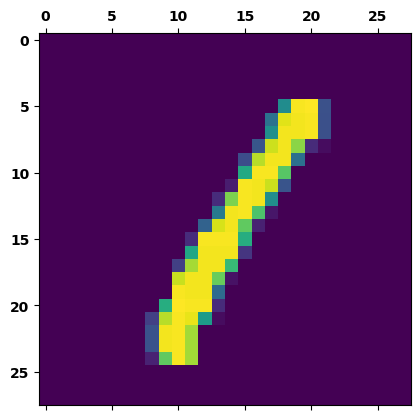

In [8]:
plt.matshow(X_train[3])

In [9]:
y_train[3]

1

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

so the X array contains matricial representation of the hand-written number and the Y array contains the tags of what number it is. I need to reshape the tridimensional array into an bidimensional one

In [11]:
X_train.shape

(60000, 28, 28)

I need to normalize the data [0 - 1]

In [12]:
X_train = X_train /255
X_test = X_test /255

the first dimension is the number of examples it has, and then each individual image is 28x28 pixels long

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4651 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9259


output shape: 10 possible outcomes
input shape: 784 images
Dense: fully connected

model is where we define out neural network.

then we compile it

fit is where the training actually happens

0.99 means high accuracy

now we are going to evaluate the accuracy in a test dataset.

In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2655 - accuracy: 0.9287


[0.26547178626060486, 0.9286999702453613]

I'm going to play a little with predictions

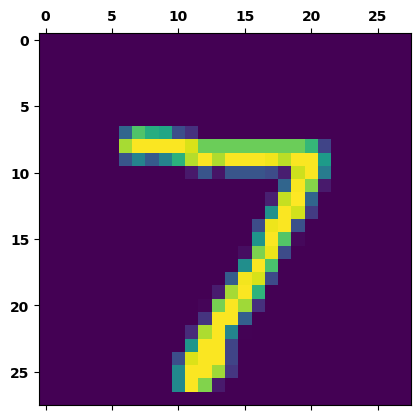

In [19]:
plt.matshow(X_test[0])

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([1.9815223e-02, 1.9370852e-07, 5.6776579e-02, 9.3536466e-01,
       2.9549820e-03, 9.0128042e-02, 1.3761642e-06, 9.9975067e-01,
       9.6654452e-02, 6.4630955e-01], dtype=float32)

it tells me the output of the 10 outcome options it has. The probabilities for every output

In [21]:
np.argmax(y_predicted[0])

7

The prediction looks to work very well, we are going to use a confusion matrix to check the overall performance

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    5,    8,    3,    2,    0],
       [   0, 1107,    3,    2,    1,    2,    4,    2,   14,    0],
       [   5,    7,  924,   17,   10,    4,   13,    9,   39,    4],
       [   3,    0,   16,  924,    1,   21,    2,   10,   24,    9],
       [   1,    1,    2,    1,  922,    0,   12,    4,    9,   30],
       [   8,    2,    2,   30,    9,  783,   16,    5,   30,    7],
       [   7,    3,    5,    1,    7,    9,  921,    2,    3,    0],
       [   1,    5,   23,    7,    8,    1,    0,  946,    2,   35],
       [   6,    6,    7,   17,    9,   24,   10,   10,  877,    8],
       [  10,    6,    1,    8,   30,    6,    0,   15,    9,  924]])>

Text(95.72222222222221, 0.5, 'Truth')

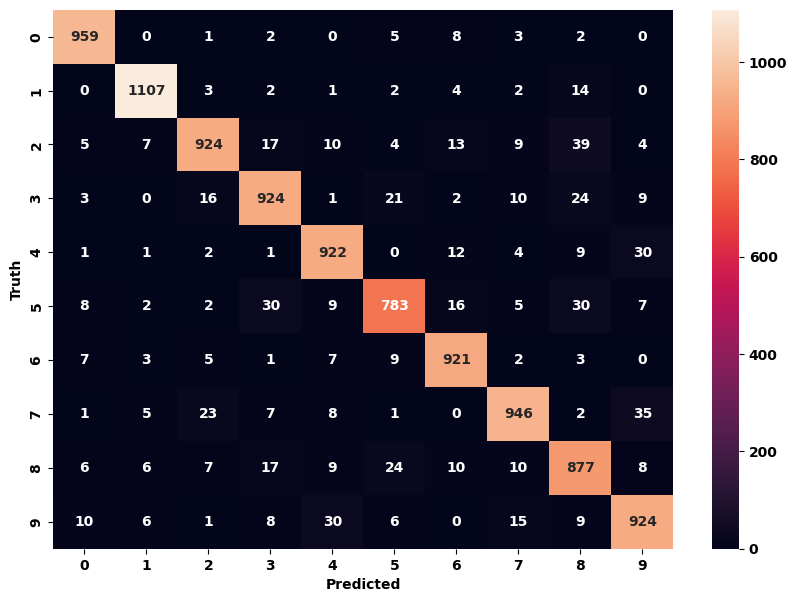

In [24]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

gonna add a hidden layer into this.

In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.9287


[0.26547178626060486, 0.9286999702453613]

the accuracy improved in the new model with a hidden layer (92 -> 97)

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

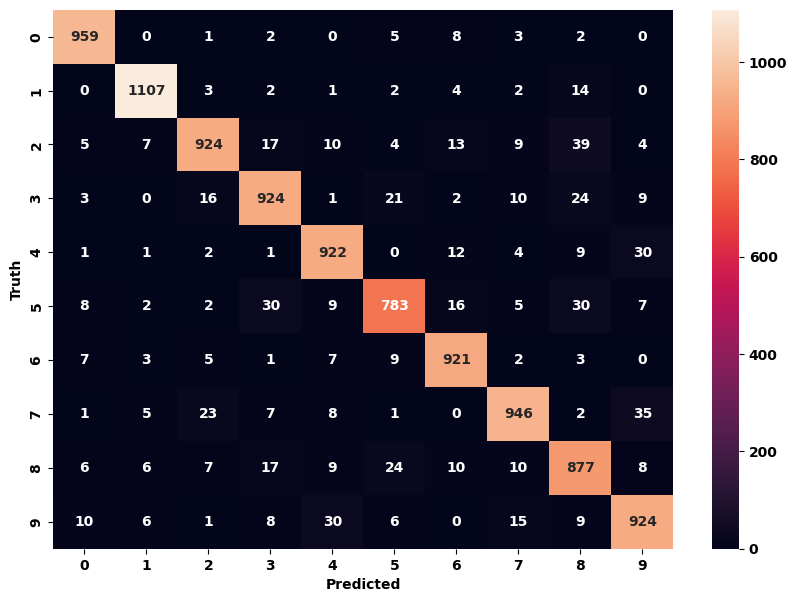

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

there is a way of skipping the flattening part though


In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),  #you don't have to specify the input shape
    keras.layers.Dense(10, activation="sigmoid") 
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2747 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1233 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0662 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9840


313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

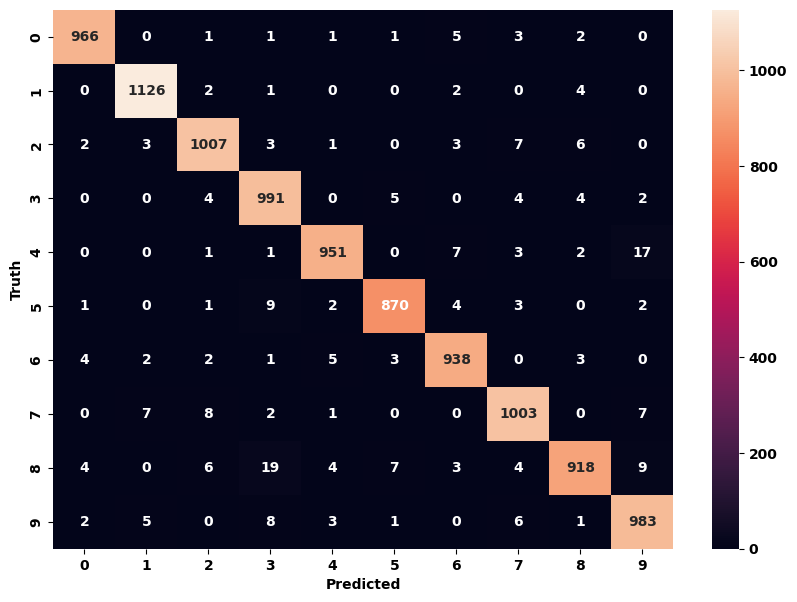

In [28]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")